In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The Differential equations are
\begin{equation}
    \ddot{x}  = x\Omega^2 +2\dot{y}\Omega - \frac{\mu_1 (x+f)}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 (x-(1-f))}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

\begin{equation}
    \ddot{y} = y\Omega^2 - 2\dot{x}\Omega - \frac{\mu_1 y}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 y}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

In [211]:
def model_3body(z,t, Omega, mu):
    x = z[0]
    vx = z[1]
    y = z[2]
    vy = z[3]
    dxdt = vx
    dydt = vy
    dvxdt = x*Omega**2 + 2*vy*Omega - (x + mu)/((x+mu)**2+y**2)**1.5 - (mu*(x-1+mu))/((x-1+mu)**2+y**2)**1.5
    dvydt = y*Omega**2 - 2*vx*Omega - y/((x+mu)**2+y**2)**1.5 - (mu*y)/((x-1+mu)**2+y**2)**1.5
    dzdt = [dxdt, dvxdt, dydt, dvydt]
    return dzdt

1.5985048714534933
2.707009742906987


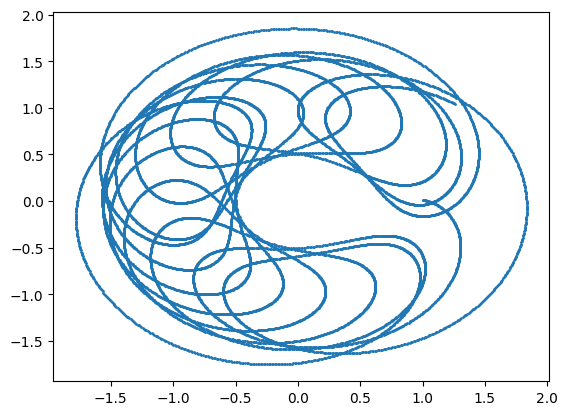

In [253]:
Nout = 10000
t = np.linspace(0, 100, Nout+1)
Omega = 1
mu = 1e-3
z0 = [1, 0.7, 0.01, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
plt.scatter(x, y, s =1)
U = Omega**2/2*(z0[0]**2+z0[2]**2) + 1/((z0[0]+mu)**2+z0[2]**2)**0.5 + mu/((z0[0]-1+mu)**2+z0[2]**2)**0.5
J_0 = 2*U - z0[1]**2 - z0[3]**2
print (U)
print (J_0)
